# Declaración de las funciones

In [2]:
function B = expandir_imagen(A)
  % Funcion que crea una copia de la imagen A repitiendo cada uno
  % de sus cuatro bordes, con una longitud de un pixel.
  % A es la imagen en formato uint8
  % B es la imagen expandida en formato uint8
  
  [m, n, r] = size(A);
  
  % Se construye una matriz que tiene dos filas y dos columnas extras
  B = zeros(m + 2, n + 2, r);

  % Se inserta la matriz A en el centro de la matriz B 
  B(2:m+1, 2:n+1, :) = A(:, :, :);
  
  % Se copian los extremos de A en los extremos de B
  B(1, 2:n+1, :) = A(1, :, :); % Copia la primera fila
  B(m+2, 2:n+1, :) = A(m, :, :); % Copia la ultima fila
  B(2:m+1, 1, :) = A(:, 1, :); % Copia la primera columna
  B(2:m+1, n+2, :) = A(:, n, :); % Copia la ultima columna

  % Se copian los valores para las esquinas
  B(1, 1, :) = A(2, 1, :); % Superior izquierda
  B(1, n+2, :) = A(2, n, :); % Superior derecha
  B(m+2, 1, :) = A(m-1, 1, :); % Inferior izquierda
  B(m+2, n+2, :) = A(m, n-1, :); % Inferior derecha
  
  B = uint8(B);
endfunction

In [3]:
function Y = bilineal(A)
  % Funcion que utiliza el algoritmo de interpolacion bilineal para
  % eliminar los pixeles faltantes de una imagen
  % A es la imagen en formato uint8
  % Y es la imagen resultante en formato uint8
  [m, n, r] = size(A);
  
  % Se realiza una copia de los bordes de la imagen A, aumentando
  % su tamaño en dos filas y dos columnas
  B = expandir_imagen(A);
  B = im2double(B);
  
  % Vector con los canales en aproximadamente cero
  cero = zeros(1, 1, r) + 0.4; 
  
  for x = 2:m+1
    for y = 2:n+1
      if (B(x, y, :) <= cero)
        x1 = x - 1; % Fila anterior
        x2 = x + 1; % Fila siguiente
        y1 = y - 1; % Columna anterior
        y2 = y + 1; % Columna siguiente
        
        % Interpolacion lineal en el eje x
        a = ((x2 - x) / (x2 - x1));
        b = ((x - x1) / (x2 - x1));
        f_R1 = a * B(x1, y1, :) + b * B(x2, y1, :);       
        f_R2 = a * B(x1, y2, :) + b * B(x2, y2, :);
  
        % Interpolacion lineal en el eje y
        c = ((y2 - y) / (y2 - y1));
        d = ((y - y1) / (y2 - y1));
        f_P = c * f_R1 + d * f_R2;

        B(x, y, :) = f_P;
      endif  
    endfor  
  endfor
  Y = B(2:m+1, 2:n+1, :);
endfunction

In [4]:
function Y = promedio(A)
  A = im2double(A);
  [m, n, r] = size(A);
  
  % Vector con los canales en cero
  cero = zeros(1, 1, r) + 0.4; 
  
  for i = 1:m
    for j = 1:n
      % Se calcula el promedio en aquellos casos
      % donde los tres canales son cero
      if (A(i, j, :) <= cero)
        vecindario = [];
        
        i_ant = i - 1; % Fila anterior
        i_sig = i + 1; % Fila siguiente
        j_ant = j - 1; % Columna anterior
        j_sig = j + 1; % Columna siguiente
        
        % Verificacion columna izquierda
        if(j_ant != 0)
          % Verificacion fila anterior
          if (i_ant != 0)
            vecindario = [vecindario A(i_ant, j_ant, :)];
          end
          % Verificacion fila siguiente
          if(i_sig != m+1)
            vecindario = [vecindario A(i_sig, j_ant, :)];
          end
          % Caso fila actual
          vecindario = [vecindario A(i, j_ant, :)];
        endif
        
        % Verificacion columna derecha
        if(j_sig != n+1)
          % Verificacion fila anterior
          if (i_ant != 0)
            vecindario = [vecindario A(i_ant, j_sig, :)];
          end
          % Verificacion fila siguiente
          if(i_sig != m+1)
            vecindario = [vecindario A(i_sig, j_sig, :)];    
          end
          % Caso fila actual
          vecindario = [vecindario A(i, j_sig, :)];
        endif     
        
        A(i, j, :) = mean(vecindario);
      end
    end
  end
  Y = A;
endfunction

# Pruebas con la 'imagen1.jpg' descargada del TecDigital

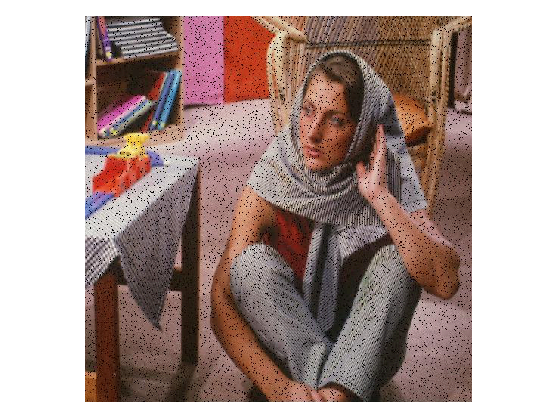

In [5]:
A1 = imread('imagen1.jpg');

imshow(A1);

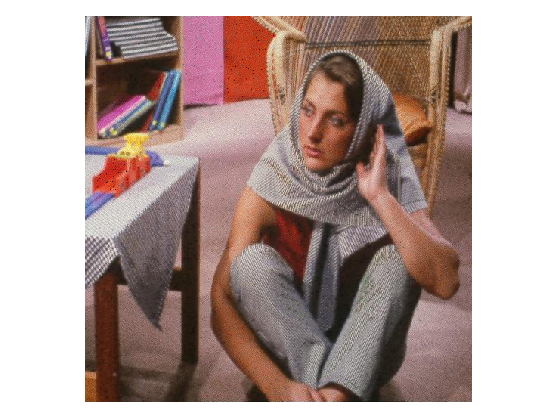

In [6]:
C1 = promedio(A1);
imshow(C1);

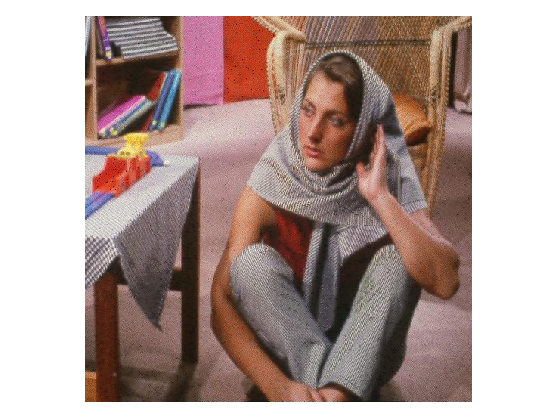

In [7]:
D1 = bilineal(A1);
imshow(D1);

# Cálculo de la mejor tolerancia utilizando la norma de Frobenius

In [ ]:
n = norm(X,'fro')